# 3. MLP

Data de entrega: 21/09/2025

O enunciado da atividade está disponível neste [link](https://insper.github.io/ann-dl/versions/2025.2/exercises/mlp/main).

---

## Config

In [1]:
from utils import data
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

---

## Exercício 1

In [33]:
x = np.array([[0.5], [-0.2]])
y = 1

W_hidden = np.array([[0.3, -0.1], [0.2, 0.4]])
b_hidden = np.array([[0.1], [-0.2]])

W_output = np.array([[0.5, -0.3]])
b_output = 0.2

eta = 0.3

# Activation function: tanh(x)
activation_function = lambda x: (np.exp(2 * x) - 1) / (np.exp(2 * x) + 1)
activation_function_derivative = lambda x: 1 - (activation_function(x)**2)

# Loss function: MSE
loss_function = lambda y, y_pred: 0.5 * (y - y_pred)**2
loss_function_derivative = lambda y, y_pred: y - y_pred

### MLP

In [34]:
mlp_data = data.MLP(input=x,
                        output=y,
                        W_hidden=W_hidden,
                        b_hidden=b_hidden,
                        W_output=W_output,
                        b_output=b_output,
                        eta=eta,
                        activation_function=activation_function,
                        activation_function_d=activation_function_derivative,
                        loss_function=loss_function,
                        loss_function_d=loss_function_derivative)

In [35]:
z1_pre, z1_activation, z2_pre, z2_activation = mlp_data.forward()

loss = mlp_data.loss_calculation(y, z2_activation)

W_hidden_gradient, b_hidden_gradient, W_output_gradient, b_output_gradient = mlp_data.backpropagation(z1_pre, z1_activation, z2_pre, z2_activation)

W_hidden, b_hidden, W_output, b_output = mlp_data.update_weights(W_hidden_gradient, b_hidden_gradient, W_output_gradient, b_output_gradient)

In [36]:
print(f"New weights hidden layer:")
print(f"{W_hidden}")
print(f"New bias hidden layer:")
print(f"{b_hidden}")
print(f"New weights output layer:")
print(f"{W_output}")
print(f"New biases output layer:")
print(f"{b_output}")

New weights hidden layer:
[[ 0.26179727 -0.08471891]
 [ 0.22385243  0.39045903]]
New bias hidden layer:
[[ 0.02359454]
 [-0.15229515]]
New weights output layer:
[[ 0.45670643 -0.27075481]]
New biases output layer:
[[0.03577581]]


---

## Exercício 2

In [552]:
from sklearn.datasets import make_classification

In [553]:
samples_1, samples_labels_1 = make_classification(n_samples=500,
                                                  n_classes=1,
                                                  n_clusters_per_class=1,
                                                  n_features=2,
                                                  n_informative=2,
                                                  n_redundant=0,
                                                  random_state=42,
                                                  class_sep=2.0)

In [554]:
samples_labels_1[:] = 0

In [555]:
samples_2, samples_labels_2 = make_classification(n_samples=500,
                                                  n_classes=1,
                                                  n_clusters_per_class=2,
                                                  n_features=2,
                                                  n_informative=2,
                                                  n_redundant=0,
                                                  random_state=42,
                                                  class_sep=2.0)

In [556]:
samples_labels_2[:] = 1

In [557]:
samples_total = np.concatenate((samples_1, samples_2))
samples_total_labels = np.concatenate((samples_labels_1, samples_labels_2))

In [558]:
shuffled_samples_total, shuffled_samples_total_labels = data.shuffle_sample(sample_array=samples_total, labels_array=samples_total_labels)

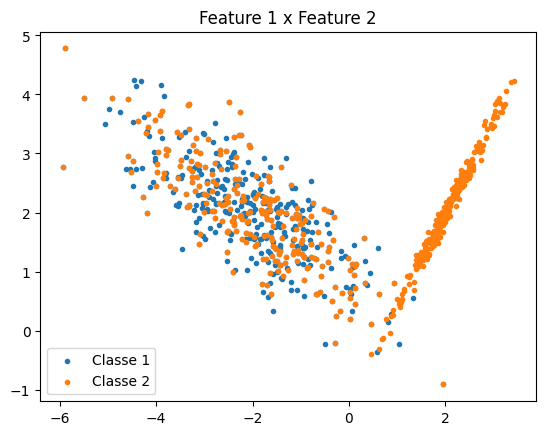

In [559]:
plt.scatter(shuffled_samples_total[shuffled_samples_total_labels==0, 0], shuffled_samples_total[shuffled_samples_total_labels==0, 1], label="Classe 1", marker=".")
plt.scatter(shuffled_samples_total[shuffled_samples_total_labels==1, 0], shuffled_samples_total[shuffled_samples_total_labels==1, 1],  label="Classe 2", marker=".")

plt.title("Feature 1 x Feature 2")
plt.legend()
plt.show()

In [560]:
# A função de ativação escolhida foi a sigmoide, pois é um problema de classificação binária (0 e 1) e também por ser uma rede pequena (MLP), onde o problema de o gradiente desaparecer é menos provável de surgir

# Para avaliar o modelo, será usado a função de perda MSE

# O otimizador é o gradiente descendente

# Os pesos serão inicializados utilizando o método de Xavier/Glorot (https://www.geeksforgeeks.org/deep-learning/xavier-initialization), utilizando a inicialização normal

In [561]:
n_in = 2  # número de features
n_out = 1 # número de saídas (0 ou 1)

In [562]:
# número de neurônios para a camada oculta
n_neurons = 10

In [563]:
# Definindo o range dos valores da inicialização dos pesos
val = (6 / (n_in + n_out))**.5
weights_range = np.linspace(-val, val, 1000)

In [564]:
# Inicializando os pesos
W_hidden = np.array([[random.choice(weights_range) for _ in range(n_in)] for _ in range(n_neurons)])

W_output = np.array([[random.choice(weights_range) for _ in range(n_neurons)]])

In [565]:
# Inicialização dos bias
b_hidden = np.zeros((n_neurons,1))
b_output = 0

In [566]:
# Dividindo a base de em treinamento e teste
train_sample, test_sample, train_sample_labels, test_sample_labels = data.train_test_split(shuffled_samples_total, shuffled_samples_total_labels)

In [567]:
train_sample = np.transpose(train_sample)

In [568]:
# Definindo a função de ativação e a derivada
sigmoid = lambda x: 1 / (1 + np.exp(-x))
sigmoid_d = lambda x: sigmoid(x) * (1 - sigmoid(x))

In [569]:
# Definindo função de perda
mse = lambda y, y_pred: 0.5 * (y - y_pred)**2
mse_d = lambda y, y_pred: y - y_pred

In [570]:
# Iniciando o treinamento
mlp_object = data.MLP(input=train_sample, output=train_sample_labels, W_hidden=W_hidden, b_hidden=b_hidden, W_output=W_output, b_output=b_output, eta=.001, activation_function=sigmoid, activation_function_d=sigmoid_d, loss_function=mse, loss_function_d=mse_d)

In [571]:
epoch_losses = {100: [], 300: [], 500: []}
epoch_accuracy = {}

for n_epochs, losses in epoch_losses.items():
    epoch_accuracy[n_epochs] = []

    for epoch in range(n_epochs):
        z1_pre, z1_activation, z2_pre, z2_activation = mlp_object.forward()

        loss = mlp_object.loss_calculation(train_sample_labels, z2_activation)
        losses.append(np.mean(loss))
        
        y_pred = (z2_activation > 0.5).astype(int)       # previsões
        acc = np.mean(y_pred == train_sample_labels)     # compara com labels
        epoch_accuracy[n_epochs].append(acc)

        W_hidden_gradient, b_hidden_gradient, W_output_gradient, b_output_gradient = mlp_object.backpropagation(z1_pre, z1_activation, z2_pre, z2_activation)

        W_hidden, b_hidden, W_output, b_output = mlp_object.update_weights(W_hidden_gradient, b_hidden_gradient, W_output_gradient, b_output_gradient)

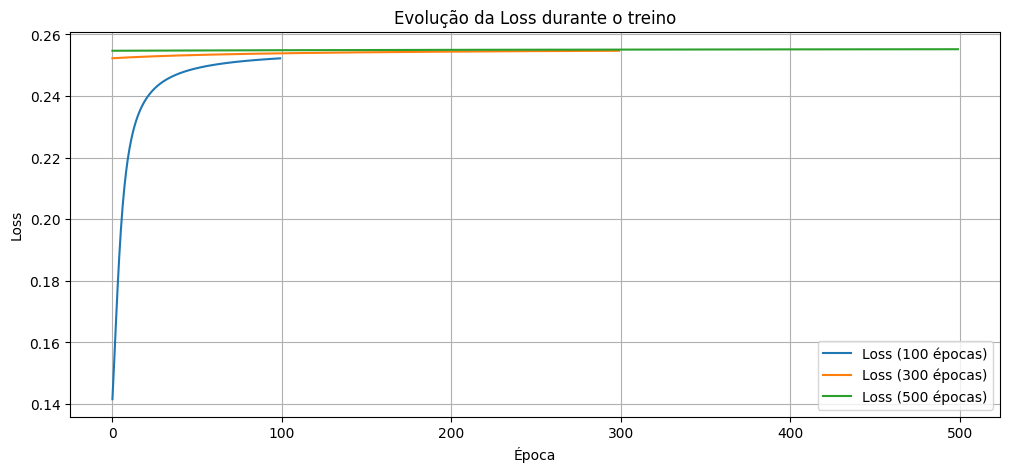

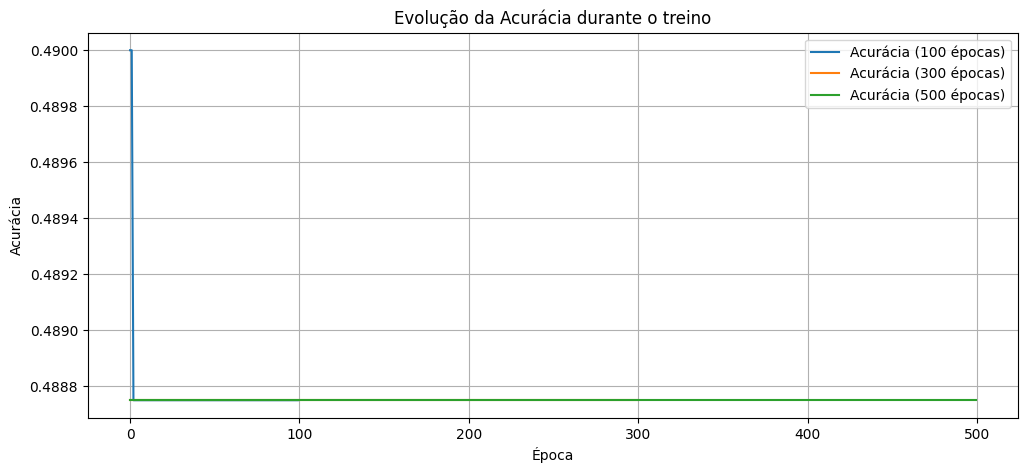

In [572]:
plt.figure(figsize=(12,5))

for n_epochs, losses in epoch_losses.items():
    plt.plot(losses, label=f"Loss ({n_epochs} épocas)")

plt.xlabel("Época")
plt.ylabel("Loss")
plt.title("Evolução da Loss durante o treino")
plt.legend()
plt.grid(True)
plt.show()


# Plot da acurácia
plt.figure(figsize=(12,5))

for n_epochs, accs in epoch_accuracy.items():
    plt.plot(accs, label=f"Acurácia ({n_epochs} épocas)")

plt.xlabel("Época")
plt.ylabel("Acurácia")
plt.title("Evolução da Acurácia durante o treino")
plt.legend()
plt.grid(True)
plt.show()

In [573]:
# O valor dos pesos muda pois pega valores aleatórios dentro do range determinado, por isso a forma que as perdas médias são registradas são diferentes a cada vez que o código é rodado
# Em geral, percebe-se que o gráfico apresenta uma função parecida com uma logarítmica, ou seja, o valor das perdas médias aumenta de acordo com o número de épocas 

In [ ]:
# basicamente o modelo ta um lixo